# Choosing train, test and validation datasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

total_per_scene = pd.read_csv("../../proportions_fixed.csv")
total_per_scene.head()

,type,scene
0,255,2013_05_28_drive_0004_sync
1,0,2013_05_28_drive_0004_sync
2,1,2013_05_28_drive_0004_sync
3,255,2013_05_28_drive_0004_sync
4,2,2013_05_28_drive_0004_sync


In [ ]:
from utils.data.labels import trainId2label

In [ ]:
trainId2label

{-1: Label(name='license plate', id=-1, kittiId=-1, trainId=-1, category='vehicle', categoryId=7, hasInstances=False, ignoreInEval=True, color=(0, 0, 142)),
 0: Label(name='road', id=7, kittiId=1, trainId=0, category='flat', categoryId=1, hasInstances=False, ignoreInEval=False, color=(128, 64, 128)),
 1: Label(name='sidewalk', id=8, kittiId=3, trainId=1, category='flat', categoryId=1, hasInstances=False, ignoreInEval=False, color=(244, 35, 232)),
 2: Label(name='building', id=11, kittiId=11, trainId=2, category='construction', categoryId=2, hasInstances=True, ignoreInEval=False, color=(70, 70, 70)),
 3: Label(name='wall', id=12, kittiId=7, trainId=3, category='construction', categoryId=2, hasInstances=False, ignoreInEval=False, color=(102, 102, 156)),
 4: Label(name='fence', id=13, kittiId=8, trainId=4, category='construction', categoryId=2, hasInstances=False, ignoreInEval=False, color=(190, 153, 153)),
 5: Label(name='pole', id=17, kittiId=21, trainId=5, category='object', categoryId

In [ ]:
labels = [trainId2label[i].name for i in range(0,18)]
labels.append(trainId2label[255].name)
labels

['road',
 'sidewalk',
 'building',
 'wall',
 'fence',
 'pole',
 'traffic light',
 'traffic sign',
 'vegetation',
 'terrain',
 'sky',
 'person',
 'rider',
 'car',
 'truck',
 'bus',
 'train',
 'motorcycle',
 'unlabeled']

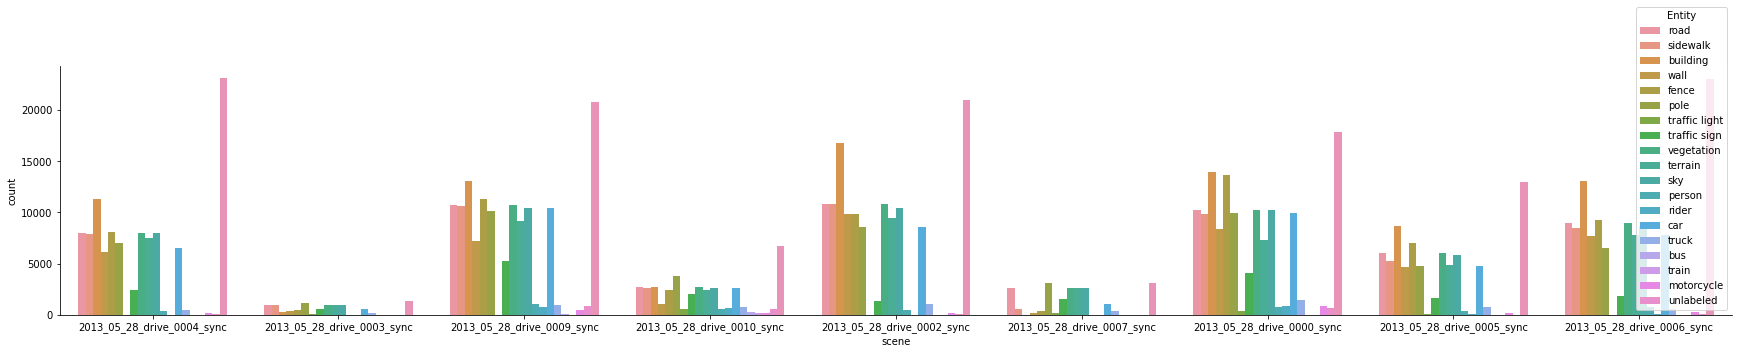

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(x="scene", hue="type",
                data=total_per_scene, kind="count",
                height=4, aspect=50/8.27)
g._legend.remove()
plt.legend(title='Entity', loc='best', labels=labels)
plt.show(g)

In [ ]:
total_per_scene.scene.unique()

array(['2013_05_28_drive_0004_sync', '2013_05_28_drive_0003_sync',
       '2013_05_28_drive_0009_sync', '2013_05_28_drive_0010_sync',
       '2013_05_28_drive_0002_sync', '2013_05_28_drive_0007_sync',
       '2013_05_28_drive_0000_sync', '2013_05_28_drive_0005_sync',
       '2013_05_28_drive_0006_sync'], dtype=object)

In [ ]:
def return_count_per_scene(scene):
  t = total_per_scene[total_per_scene['scene'] == scene].value_counts(sort=False)
  a1 = t.to_dict()
  a2 = []
  for i in range(0,19):
    k = (i,scene)
    if k in a1.keys():
      a2.append(a1.get(k))
    else:
      a2.append(0)

  return a2

In [ ]:
import matplotlib

norm = matplotlib.colors.Normalize(vmin=0, vmax=21)

cmap = matplotlib.cm.get_cmap('rainbow')
colors = [cmap(norm(i)) for i in range(0,20)]
print(colors)

[(0.5, 0.0, 1.0, 1.0), (0.40588235294117647, 0.1473016980546375, 0.997269173385788, 1.0), (0.31176470588235294, 0.2913897468893246, 0.989091608371146, 1.0), (0.21764705882352942, 0.42912060877260894, 0.9755119679804366, 1.0), (0.12352941176470589, 0.5574894393428855, 0.9566044195004408, 1.0), (0.02941176470588236, 0.6736956436465572, 0.9324722294043558, 1.0), (0.0725490196078431, 0.7829276104921027, 0.9005867023006374, 1.0), (0.16666666666666663, 0.8660254037844386, 0.8660254037844387, 1.0), (0.26078431372549016, 0.9302293085467402, 0.8267341748257635, 1.0), (0.3549019607843137, 0.9741386021045101, 0.7829276104921028, 1.0), (0.4490196078431372, 0.9967953249171991, 0.7348449670469758, 1.0), (0.5509803921568628, 0.9967953249171991, 0.678235117349234, 1.0), (0.6450980392156862, 0.9741386021045102, 0.622112816721474, 1.0), (0.7392156862745098, 0.9302293085467404, 0.5625927516198231, 1.0), (0.8333333333333333, 0.8660254037844387, 0.5000000000000001, 1.0), (0.9274509803921569, 0.782927610492

Text(0.5, 1.0, 'Scene 10')

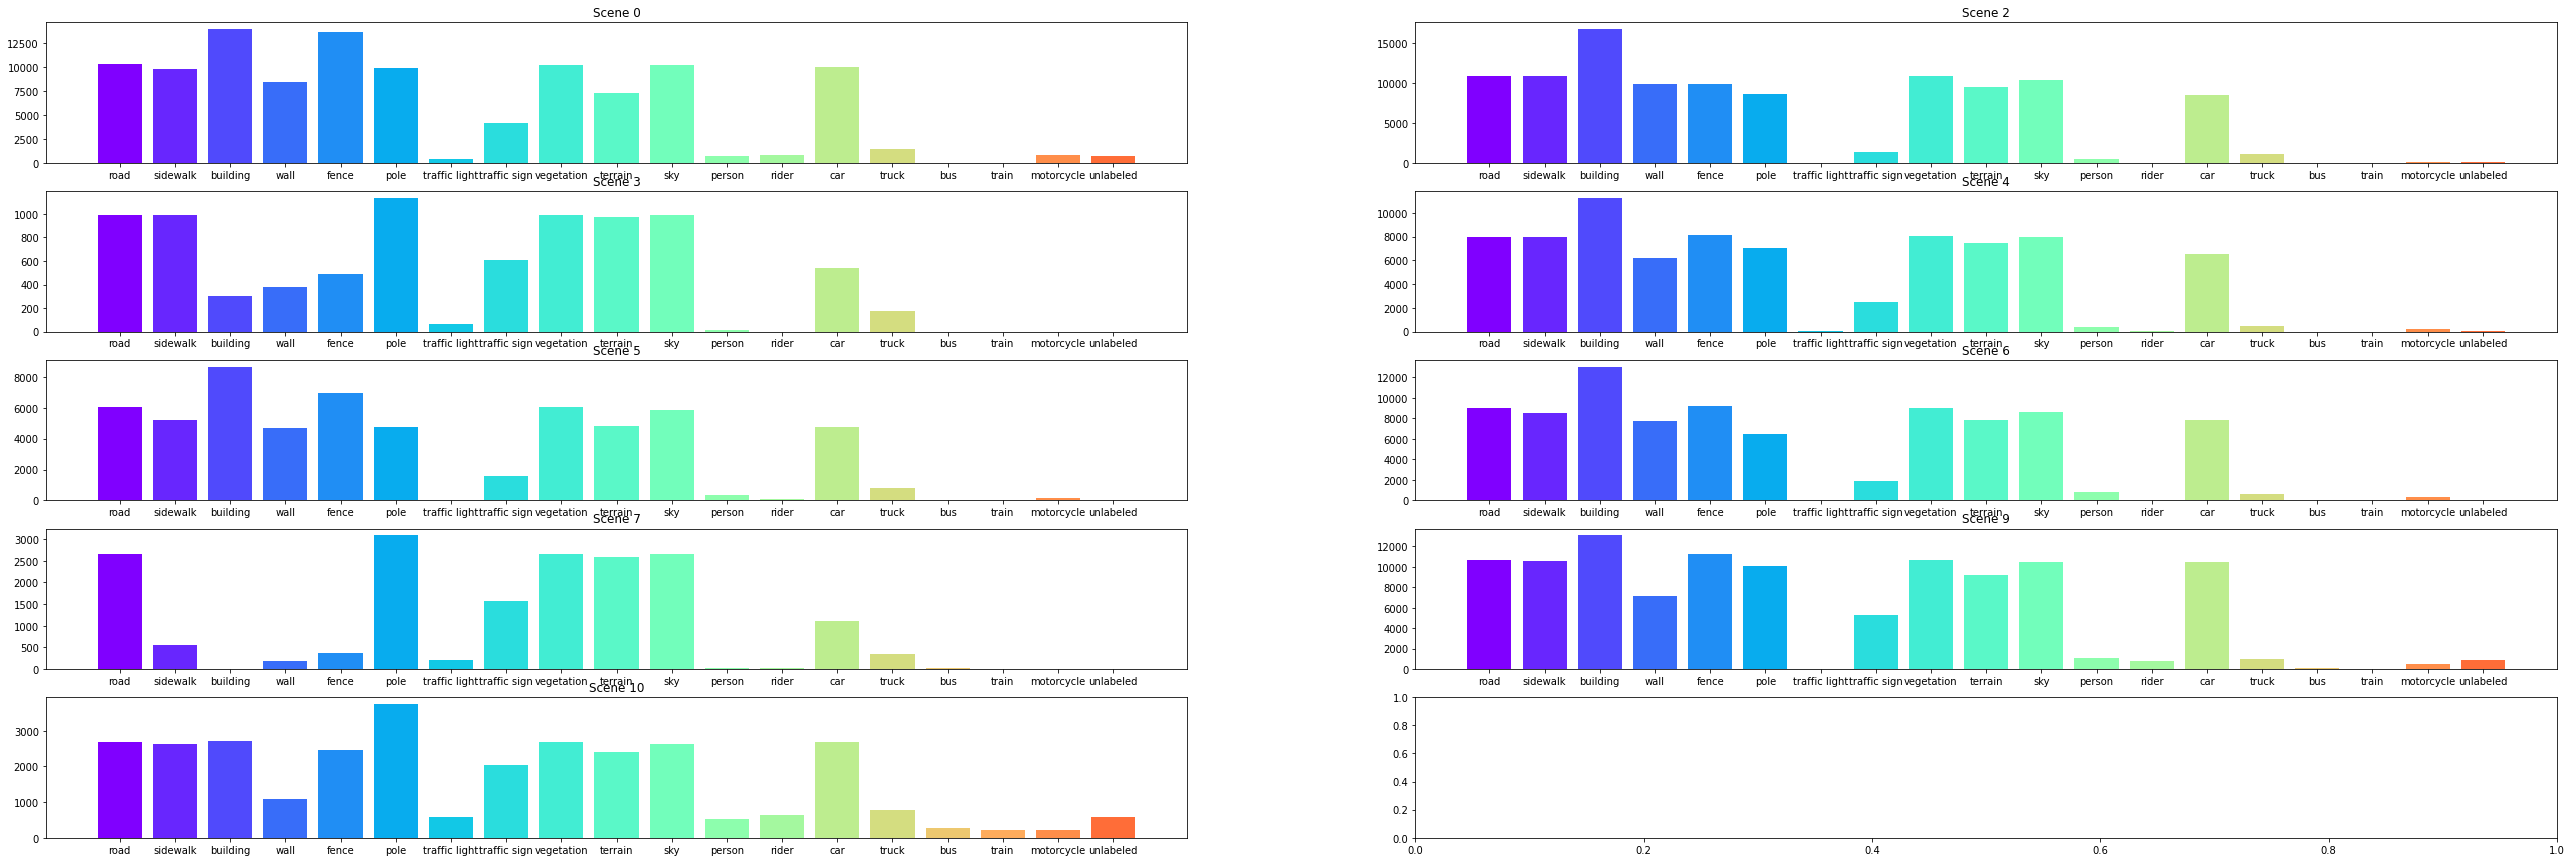

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(45,15))


axs[0, 0].bar(labels, return_count_per_scene('2013_05_28_drive_0000_sync'), color=colors)
axs[0, 0].set_title('Scene 0')
axs[0, 1].bar(labels, return_count_per_scene('2013_05_28_drive_0002_sync'), color=colors)
axs[0, 1].set_title('Scene 2')
axs[1, 0].bar(labels, return_count_per_scene('2013_05_28_drive_0003_sync'), color=colors)
axs[1, 0].set_title('Scene 3')
axs[1, 1].bar(labels, return_count_per_scene('2013_05_28_drive_0004_sync'), color=colors)
axs[1, 1].set_title('Scene 4')
axs[2, 0].bar(labels, return_count_per_scene('2013_05_28_drive_0005_sync'), color=colors)
axs[2, 0].set_title('Scene 5')
axs[2, 1].bar(labels, return_count_per_scene('2013_05_28_drive_0006_sync'), color=colors)
axs[2, 1].set_title('Scene 6')
axs[3, 0].bar(labels, return_count_per_scene('2013_05_28_drive_0007_sync'), color=colors)
axs[3, 0].set_title('Scene 7')
axs[3, 1].bar(labels, return_count_per_scene('2013_05_28_drive_0009_sync'), color=colors)
axs[3, 1].set_title('Scene 9')
axs[4, 0].bar(labels, return_count_per_scene('2013_05_28_drive_0010_sync'), color=colors)
axs[4, 0].set_title('Scene 10')

Text(0.5, 1.0, 'Scene 10')

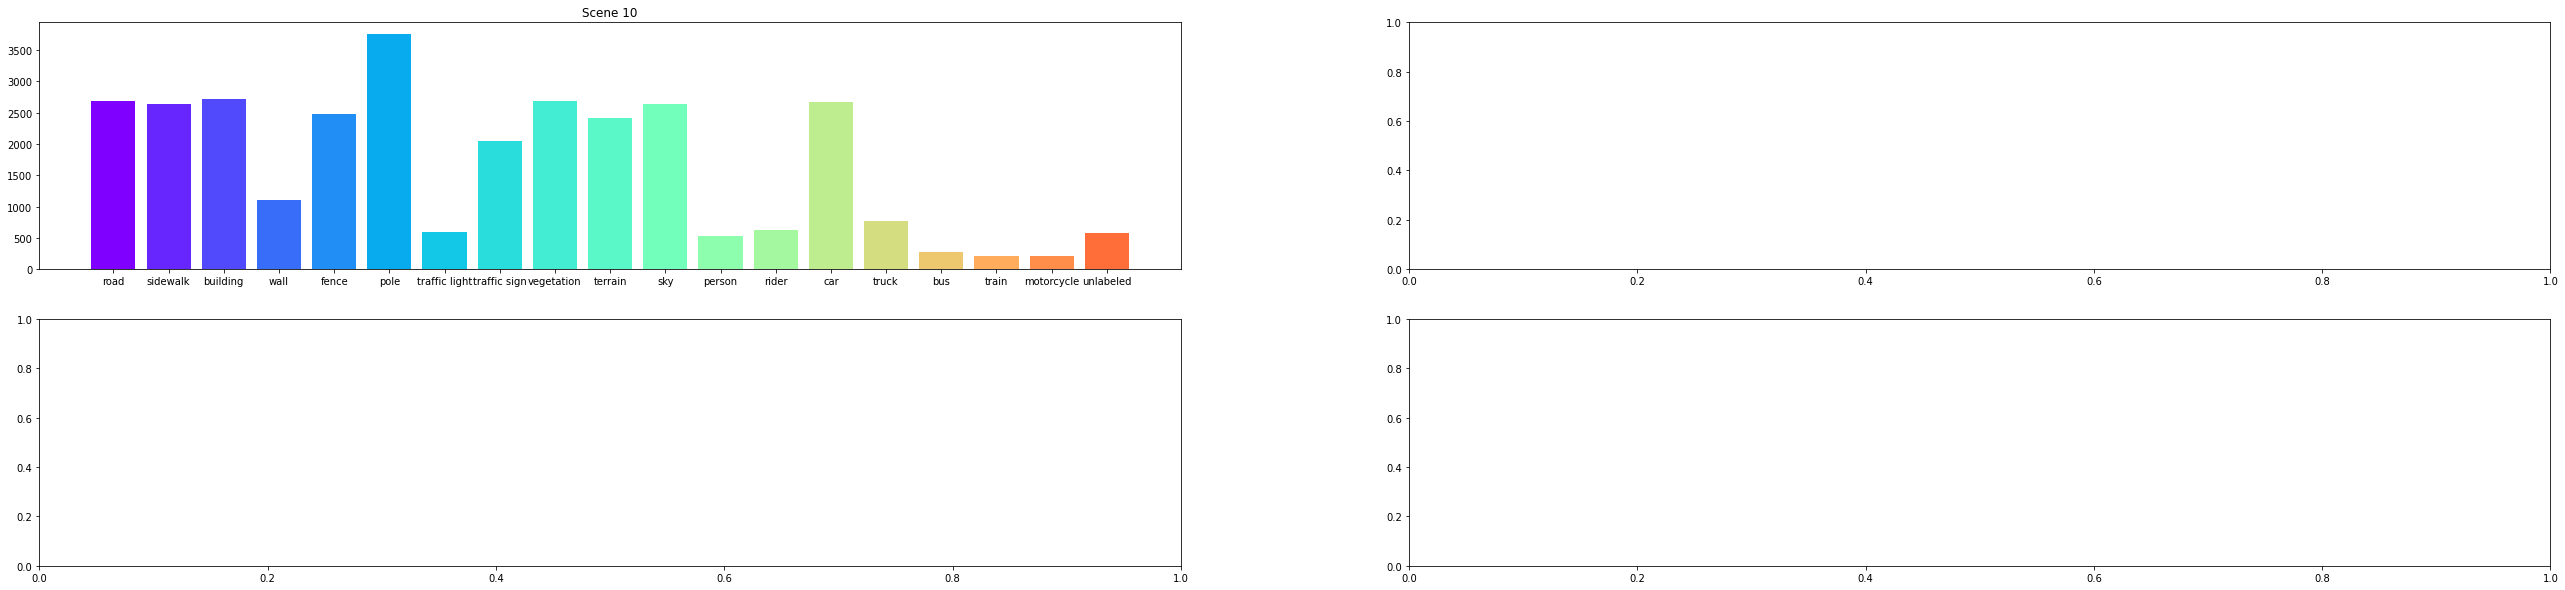

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(45,10))

axs[0, 0].bar(labels, return_count_per_scene('2013_05_28_drive_0010_sync'), color=colors)
axs[0, 0].set_title('Scene 10')

Training:
* Scenes 0, 4, 6, 9, 10

Validation:
* Scenes 5, 7

Testing:
* Scenes 2, 3